In [1]:
import pandas as pd
import string
import numpy as np
products=pd.read_csv('amazon_baby.csv')

In [2]:
tr_idx=pd.read_json('module-9-assignment-train-idx.json')[0]
ts_idx=pd.read_json('module-9-assignment-test-idx.json')[0]
products=products.fillna({'review':''})
full=len(products['review'])
print(full)

183531


In [3]:
translator=str.maketrans({k:None for k in string.punctuation})
def translate(text):
    
    return text.translate(translator)
products['review']=products['review'].fillna({'review':''})

In [4]:
products['review_clean']=products['review'].iloc[:].apply(translate)

In [5]:
products = products[products['rating'] != 3].copy()
products['sentiment'] = products['rating'].apply(lambda rating : +1 if rating > 3 else -1)

In [6]:
products.head(3)
train_data=products.iloc[tr_idx]
test_data=products.iloc[ts_idx]

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
     # Use this token pattern to keep single-letter words
# First, learn vocabulary from the training data and assign columns to words
# Then convert the training data into a sparse matrix
train_matrix = vectorizer.fit_transform(train_data['review_clean'])
# Second, convert the test data into a sparse matrix, using the same word-column mapping
test_matrix = vectorizer.transform(test_data['review_clean'])

In [8]:
from sklearn import linear_model
model=linear_model.LogisticRegression()
model.fit(train_matrix,train_data['sentiment'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=test_data['sentiment'].values, y_pred=model.predict(test_matrix))
print ("Test Accuracy: %s" % accuracy)

Test Accuracy: 0.9322954163666907


In [10]:
baseline = len(test_data[test_data['sentiment'] == 1])/len(test_data)
print ("Baseline accuracy (majority class classifier): %s" % baseline)
model.classes_

Baseline accuracy (majority class classifier): 0.8427825773938085


array([-1,  1], dtype=int64)

In [11]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_true=test_data['sentiment'].values,
                        y_pred=model.predict(test_matrix),
                        labels=model.classes_)    # use the same order of class as the LR model.
print (' target_label | predicted_label | count ')
print ('--------------+-----------------+-------')
# Print out the confusion matrix.
# NOTE: Your tool may arrange entries in a different order. Consult appropriate manuals.
for i, target_label in enumerate(model.classes_):
    for j, predicted_label in enumerate(model.classes_):
        print ('{0:^13} | {1:^15} | {2:5d}'.format(target_label, predicted_label, cmat[i,j]))

 target_label | predicted_label | count 
--------------+-----------------+-------
     -1       |       -1        |  3788
     -1       |        1        |  1453
      1       |       -1        |   804
      1       |        1        | 27291


In [12]:
from matplotlib import pyplot as plt
import itertools

In [65]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='none', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes[::-1])
    plt.yticks(tick_marks, classes[::-1])

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

interpolation='none'/'nearest'/'spline16'/'spline36'

Confusion matrix, without normalization
[[ 3788  1453]
 [  804 27291]]


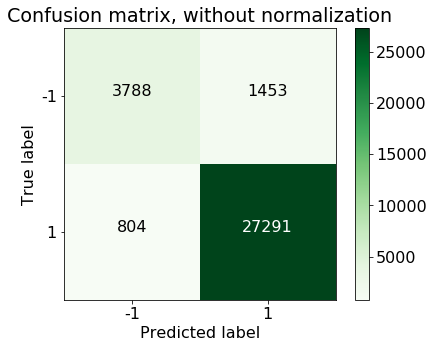

In [66]:
cnf_matrixcnf_matr  = confusion_matrix(test_data['sentiment'], model.predict(test_matrix))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrixcnf_matr, classes=test_data['sentiment'].unique(),
                      title='Confusion matrix, without normalization')

In [15]:
test_data['sentiment'].unique()

array([ 1, -1], dtype=int64)

In [16]:
cnf_matrixcnf_matr

array([[ 3788,  1453],
       [  804, 27291]], dtype=int64)

In [17]:
from sklearn.metrics import precision_score
precision_05 = precision_score(y_true=test_data['sentiment'].values, 
                            y_pred=model.predict(test_matrix))
print ("Precision on test data: %s" % precision_05)

from sklearn.metrics import recall_score
recall_05 = recall_score(y_true=test_data['sentiment'].values,
                      y_pred=model.predict(test_matrix))
print ("Recall on test data: %s" % recall_05)

Precision on test data: 0.9494503200667965
Recall on test data: 0.9713828083288841


In [18]:
probabilities = model.predict_proba(test_matrix)[:,1]

In [19]:
def apply_threshold(prob,threshold):
    proba=np.zeros(len(prob))
    proba[prob>threshold]=+1
    proba[prob<=threshold]=-1
    return proba

In [20]:
proba=model.predict_proba(test_matrix)[:,1]
proba

array([0.78, 1.  , 0.93, ..., 1.  , 1.  , 0.98])

In [70]:
threshold_pred=apply_threshold(proba,0.98)

In [79]:
np.sum((threshold_pred==-1)&(test_data['sentiment']==1))

8210

In [71]:
np.sum(threshold_pred==1)

20079

In [72]:
np.sum(model.predict(test_matrix)==1)

28744

In [73]:
from sklearn.metrics import precision_score
precision_09 = precision_score(y_true=test_data['sentiment'].values, 
                            y_pred=threshold_pred)
print ("Precision on test data: %s" % precision_09)

from sklearn.metrics import recall_score
recall_09 = recall_score(y_true=test_data['sentiment'].values,
                      y_pred=threshold_pred)
print ("Recall on test data: %s" % recall_09)

Precision on test data: 0.9903381642512077
Recall on test data: 0.7077771845524115


In [25]:
threshold_values = np.linspace(0.5, 1, num=100)
print (threshold_values)

[0.5  0.51 0.51 0.52 0.52 0.53 0.53 0.54 0.54 0.55 0.55 0.56 0.56 0.57
 0.57 0.58 0.58 0.59 0.59 0.6  0.6  0.61 0.61 0.62 0.62 0.63 0.63 0.64
 0.64 0.65 0.65 0.66 0.66 0.67 0.67 0.68 0.68 0.69 0.69 0.7  0.7  0.71
 0.71 0.72 0.72 0.73 0.73 0.74 0.74 0.75 0.75 0.76 0.76 0.77 0.77 0.78
 0.78 0.79 0.79 0.8  0.8  0.81 0.81 0.82 0.82 0.83 0.83 0.84 0.84 0.85
 0.85 0.86 0.86 0.87 0.87 0.88 0.88 0.89 0.89 0.9  0.9  0.91 0.91 0.92
 0.92 0.93 0.93 0.94 0.94 0.95 0.95 0.96 0.96 0.97 0.97 0.98 0.98 0.99
 0.99 1.  ]


In [26]:
precisions=[precision_score(y_true=test_data['sentiment'].values,y_pred=apply_threshold(proba,i)) for i in threshold_values[:-1]]
recalls=[recall_score(y_true=test_data['sentiment'].values,y_pred=apply_threshold(proba,i)) for i in threshold_values[:-1]]

In [27]:
tr_p_r=pd.Series(data=precisions,index=recalls)

In [28]:
def plot_pr_curve(precision, recall, title):
    plt.rcParams['figure.figsize'] = 7, 5
    plt.locator_params(axis = 'x', nbins = 5)
    plt.plot(precision, recall, 'b-', linewidth=4.0, color = '#B0017F')
    plt.title(title)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.rcParams.update({'font.size': 16})

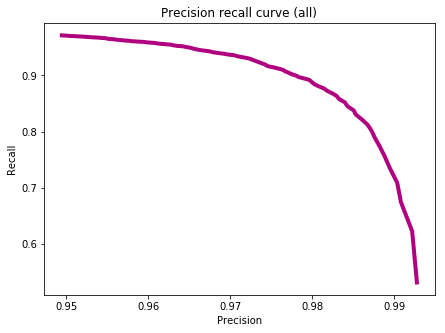

In [29]:
plot_pr_curve(precisions, recalls, 'Precision recall curve (all)')

In [30]:
pr_mat=pd.DataFrame({'threshold':threshold_values[:-1],'precision':precisions,'recall':recalls})

In [69]:
pr_mat[pr_mat['threshold']>=0.979].sort_values('threshold',ascending=True).head()

,threshold,precision,recall
95,0.979798,0.990356,0.709130
96,0.984848,0.990804,0.674960
97,0.989899,0.992177,0.622993
98,0.994949,0.992759,0.531910


In [32]:
pr_mat[pr_mat['precision']>=0.965].sort_values('threshold',ascending=True).head()

,threshold,precision,recall
41,0.707071,0.965117,0.949315
42,0.712121,0.965305,0.948710
43,0.717172,0.965478,0.947678
44,0.722222,0.965731,0.946894
45,0.727273,0.966145,0.945684


In [33]:
test_data['name']=test_data['name'].str.lower()

C:\Users\shuoyan001\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
idx=test_data['name'].str.contains('baby').values

In [45]:
bb_review=test_data.iloc[idx==True]

In [92]:
test_data.iloc[(idx!=True)&(idx!=False)].head()

,name,review,rating,review_clean,sentiment
22238,NaN,I bought this for my own daughter and ABSOLUTL...,5,I bought this for my own daughter and ABSOLUTL...,1
22245,NaN,Soft snuggly practical item. Great service! Ba...,5,Soft snuggly practical item Great service Baby...,1
36100,NaN,If you have stud finder or any strong magnet.....,4,If you have stud finder or any strong magnet g...,1
36107,NaN,I bought two 4 packs of these locks as we just...,2,I bought two 4 packs of these locks as we just...,-1
36109,NaN,"A slight pain to install (drawers are easy, bu...",4,A slight pain to install drawers are easy but ...,1


In [53]:
baby_matrix = vectorizer.transform(bb_review['review_clean'])
probabilities = model.predict_proba(baby_matrix)[:,1]

In [54]:
probabilities

array([0.78, 1.  , 1.  , ..., 0.93, 1.  , 0.98])

In [59]:
bb_precisions=[precision_score(y_true=bb_review['sentiment'].values,y_pred=apply_threshold(probabilities,i)) for i in threshold_values[:-1]]
bb_recalls=[recall_score(y_true=bb_review['sentiment'].values,y_pred=apply_threshold(probabilities,i)) for i in threshold_values[:-1]]

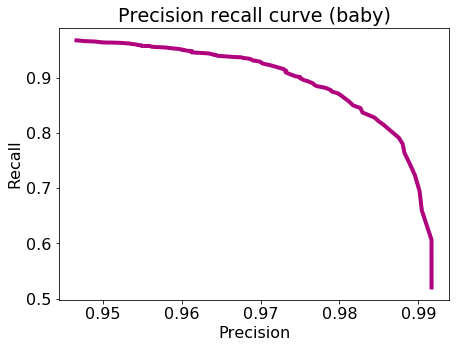

In [60]:
plot_pr_curve(bb_precisions, bb_recalls, 'Precision recall curve (baby)')

In [80]:
bb_mat=pd.DataFrame({'threshold':threshold_values[:-1],'precision':bb_precisions,'recall':bb_recalls})

In [81]:
bb_mat[bb_mat['precision']>=0.965].sort_values('threshold',ascending=True).head()

,threshold,precision,recall
47,0.737374,0.966467,0.937829
48,0.742424,0.967530,0.937102
49,0.747475,0.967851,0.935830
50,0.752525,0.968368,0.934921
51,0.757576,0.968538,0.934557
